#NLTK and SpaCy Libraries

In [4]:
# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import spacy
!pip install contractions
import contractions

In [5]:
nltk.download("all")
!python -m spacy download en_core_web_sm

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Najeeb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Najeeb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Najeeb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Najeeb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Najeeb\AppData\Roaming\nltk_data...
[nltk_data] 

     ---------------------------------------- 12.8/12.8 MB 1.7 MB/s eta 0:00:00


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


#Import Tensorflow Libraries

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.utils import to_categorical

#Import Other Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Get Data

In [8]:
data = pd.read_csv(r"C:\Users\Najeeb\Desktop\SIT Semesters\Sem 5\Hackathon investors\EXTRA OFFICIAL CHECKPOINT\data scraped for model.csv", names=["target","content"])
data = data[["content","target"]].reset_index()
data = data[["content","target"]]
data = data.drop(data.index[0])
data.head()

,content,target
1,so let's say you want to get started with thi...,Not Misleading
2,you are young I'm 17 years old you're ambitio...,Not Misleading
3,Recently one of my subscribers asked me that U...,Misleading
4,Let's answer one of my questions. Without inve...,Misleading
5,Let's answer one of my questions. Without inve...,Misleading


#Text Pre-processing


In [9]:
len(data)

1655

In [10]:
data.dropna(inplace = True)
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

In [11]:
len(data)

1542

#Text Cleaning

In [12]:
#Regular Expression
regexp = RegexpTokenizer("[\w']+")

In [13]:
#Lowercase
def text_lower(text):
  text = text.lower()
  return text

In [14]:
#Remove Whitespace
def remove_whitespace(text):
  text = text.strip()
  return text

In [15]:
#Remove Punctuation
def remove_punctuation(text):
  punct = string.punctuation
  punct = punct.replace("'","")
  text = text.translate(str.maketrans("", "",punct))
  return text

In [16]:
#Remove HTML
def remove_html(text):
  html = re.compile(r'<.*?>')
  text = html.sub(r'',text)
  return text

In [17]:
# Removing emojis
def remove_emoji(text):
  emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+",flags=re.UNICODE
  )
  text = emoji_pattern.sub(r'',text)
  return text

In [18]:
#Remove URLS
def remove_http_links(text):
  text = re.sub('http://\S+|https://\S+','',text)
  return text

In [19]:
#Convert Abbreviated Words
abbrev = pd.read_csv(r"C:\Users\Najeeb\Downloads\abbrevations.csv",names=['SMF','FF'])
abbrev.head()

,SMF,FF
0,?,I have a question
1,?,I don’t understand what you mean
2,?4U,I have a question for you
3,;S,GeHmm? What did you say?
4,^^,read message


In [20]:
abbrev_lower = pd.DataFrame()
abbrev_lower['SMF'] = abbrev['SMF'].apply(text_lower)
abbrev_lower['FF'] = abbrev['FF'].apply(text_lower)
abbrev_dict = dict(zip(list(abbrev_lower.SMF), list(abbrev_lower.FF)))
abbrev_words = list(abbrev_dict.keys())

In [21]:
def convert_abbrev(text):
  words = []
  for word in regexp.tokenize(text):
    if word in abbrev_words:
      words = words + abbrev_dict[word].split()
    else:
      words = words + word.split()

  text_converted = " ".join(words)

  return text_converted

In [22]:
#Convert Contractions like you're
def convert_contractions(text):
  text = contractions.fix(text)
  return text

In [23]:
#Remove Stopwords
def remove_stopwords(text):
  text = " ".join([word for word in nltk.tokenize.word_tokenize(text) if word not in stopwords.words('english')])
  return text

In [24]:
#Lemmatization

# Lemmatization
nlp = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

def lemmatize(text):
  text = " ".join([token.lemma_ for token in nlp(text)])
  return text

In [25]:
#Remove Non-Alphabetic Characters
def discard_non_alpha(text):
  word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
  text = " ".join(word_list_non_alpha)
  return text

In [26]:
#Aggregating All definitions

def text_clean(text):
  text = text_lower(text)
  text = remove_whitespace(text)
  text = re.sub('\n' , '', text)
  text = re.sub('\[.*?\]', '', text)
  text = remove_http_links(text)
  text = remove_punctuation(text)
  text = remove_html(text)
  text = remove_emoji(text)
  text = convert_abbrev(text)
  text = convert_contractions(text)
  text = remove_stopwords(text)
  text = discard_non_alpha(text)
  text = lemmatize(text)

  return text

In [27]:
# Apply on Dataset
data['Description_Clean'] = data['content'].apply(text_clean)
data.head()

,content,target,Description_Clean
0,so let's say you want to get started with thi...,Not Misleading,significant let we say want get start invest t...
1,you are young I'm 17 years old you're ambitio...,Not Misleading,acronym rich environment young year old ambiti...
2,Recently one of my subscribers asked me that U...,Misleading,recently one subscriber ask umer want earn per...
3,Let's answer one of my questions. Without inve...,Misleading,let we answer one question without invest mone...
4,"So hello everyone, welcome back to our channel...",Misleading,significant hello everyone welcome back channe...


#Label Encoding

In [28]:
data["target"] = data["target"].str.strip()  # Remove any leading/trailing whitespace

# Map variations of 'Not Misleading' to 'Not Mis leading'
data["target"] = data["target"].replace(['Not Misleading', ' Not Misleading', "Not Misleading''"], 'Not Mis leading')

# Drop rows containing 'v' in the 'target' column
data = data[data["target"] != 'v']

# Drop duplicate rows
data = data.drop_duplicates()

# Display the cleaned DataFrame
print(data)

                                                content           target  \
0     so let's say you want to get started  with thi...  Not Mis leading   
1     you are young I'm 17 years old you're  ambitio...  Not Mis leading   
2     Recently one of my subscribers asked me that U...       Misleading   
3     Let's answer one of my questions. Without inve...       Misleading   
4     So hello everyone, welcome back to our channel...       Misleading   
...                                                 ...              ...   
1537  Want explicit SEX in 30 secs? Ring 02073162414...       Misleading   
1538  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...       Misleading   
1539  Had your contract mobile 11 Mnths? Latest Moto...       Misleading   
1540  REMINDER FROM O2: To get 2.50 pounds free call...       Misleading   
1541  This is the 2nd time we have tried 2 contact u...       Misleading   

                                      Description_Clean  
0     significant let we say 

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have loaded your DataFrame into 'data'

# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode the 'target' column and add the encoded labels to a new column 'Encoded_Labels'
data['Encoded_Labels'] = le.fit_transform(data['target'])

# Manually map the original labels to desired numerical values
label_mapping = {'Not Mis leading': 0, 'Misleading': 1}
data['Encoded_Labels'] = data['target'].map(label_mapping)

# Get the number of unique classes
label_len = len(label_mapping)

# Display the modified DataFrame
print(data.head())
inv_labels = le.inverse_transform([0,1])

                                             content           target  \
0  so let's say you want to get started  with thi...  Not Mis leading   
1  you are young I'm 17 years old you're  ambitio...  Not Mis leading   
2  Recently one of my subscribers asked me that U...       Misleading   
3  Let's answer one of my questions. Without inve...       Misleading   
4  So hello everyone, welcome back to our channel...       Misleading   

                                   Description_Clean  Encoded_Labels  
0  significant let we say want get start invest t...               0  
1  acronym rich environment young year old ambiti...               0  
2  recently one subscriber ask umer want earn per...               1  
3  let we answer one question without invest mone...               1  
4  significant hello everyone welcome back channe...               1  


In [46]:
data["target"].value_counts()

Not Mis leading    803
Misleading         732
Name: target, dtype: int64

In [47]:
data['Encoded_Labels'].unique()

array([0, 1], dtype=int64)

#Data Splitting

In [68]:
X_train, X_test, y_train, y_test = train_test_split(

data.Description_Clean,
data.Encoded_Labels,
stratify=data.Encoded_Labels,
random_state=2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

#LSTM INPUT

**batch_size:** The number of sequences you feed into the model at once. It's a hyperparameter that you specify when training and represents the number of samples that are processed in parallel during each training iteration. For example, if your batch size is 32, then you'll process 32 sequences at a time.

**sequence_length:** The length of each input sequence. This value is determined by the padding you applied to make all sequences the same length. If your maximum sequence length is, for instance, 50 (meaning all sequences are padded/truncated to 50 tokens), then sequence_length would be 50.

**embedding_dim:** The dimensionality of the word embeddings used to represent each token in the sequence. This is the length of the dense vectors used to represent words. It's a hyperparameter that you set based on your problem and the size of your dataset. For instance, you might choose an embedding_dim of 100 or 300

#Processing Data for DL

In [69]:
batch_size = 64
max_words = 10000
max_len = 200
embedding_dim = 100
lstm_units = 64

In [70]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seqs = tok.texts_to_sequences(X_train)
test_seqs = tok.texts_to_sequences(X_test)
seq_matrix = sequence.pad_sequences(seqs,max_len)
test_seq_matrix = sequence.pad_sequences(test_seqs,max_len)

In [71]:
seq_matrix[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

#LSTM Model

In [72]:
def LSTM_Model(words,len,dim,units,num_labels):
  model = tf.keras.Sequential()
  model.add(Embedding(input_dim=words, output_dim=dim, input_length=len))
  model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(num_labels, activation='softmax'))
  model.compile(optimizer='adam',

  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']) 

  return model

In [73]:
model = LSTM_Model(max_words,max_len,embedding_dim,lstm_units,label_len)

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 lstm_3 (LSTM)               (None, 64)                42240     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1,042,370
Trainable params: 1,042,370
Non-trainable params: 0
_________________________________________________________________


#Train Model

In [75]:
model.fit(seq_matrix,y_train,epochs=3,batch_size=batch_size,validation_split=0.2)

Epoch 1/3
15/15 [==============================] - 6s 263ms/step - loss: 0.6532 - accuracy: 0.7087 - val_loss: 0.5859 - val_accuracy: 0.6320
Epoch 2/3
15/15 [==============================] - 3s 204ms/step - loss: 0.4744 - accuracy: 0.8109 - val_loss: 0.4058 - val_accuracy: 0.8095
Epoch 3/3
15/15 [==============================] - 4s 244ms/step - loss: 0.2920 - accuracy: 0.8978 - val_loss: 0.2671 - val_accuracy: 0.8831


#Test Model

In [76]:
prediction = model.predict(test_seq_matrix)

12/12 [==============================] - 0s 20ms/step


In [77]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,np.argmax(prediction,axis=1),

target_names=inv_labels))

                 precision    recall  f1-score   support

     Misleading       0.88      0.91      0.90       201
Not Mis leading       0.90      0.87      0.88       183

       accuracy                           0.89       384
      macro avg       0.89      0.89      0.89       384
   weighted avg       0.89      0.89      0.89       384



In [78]:
import seaborn as sns

<AxesSubplot:>

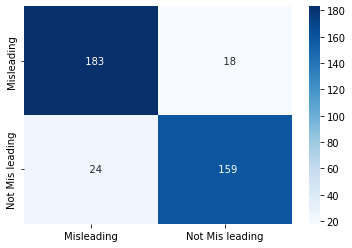

In [79]:
sns.heatmap(confusion_matrix(y_test,np.argmax(prediction,axis=1)),
annot=True,fmt='5',cmap='Blues',xticklabels=inv_labels,
yticklabels=inv_labels)

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

# Replace y_test, prediction, and inv_labels with your actual data
# y_test = ...
# prediction = ...
# inv_labels = ...

conf_matrix = confusion_matrix(y_test, np.argmax(prediction, axis=1))
inv_labels= inv_labels[::-1]
annotations = []
for i in range(len(inv_labels)):
    for j in range(len(inv_labels)):
        annotations.append(
            dict(
                x=inv_labels[i],
                y=inv_labels[j],
                text=str(conf_matrix[j, i]),
                showarrow=False
            )
        )

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=inv_labels,
    y=inv_labels,
    colorscale='Earth',  # Change the color scale to your preferred scale
    colorbar=dict(title="Count")
))

fig.update_layout(
    title='Confusion Matrix Heatmap with Annotations',
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels',
    autosize=False,
    width=600,
    height=500,
    annotations=annotations
)

fig.show()
